# Complementaria 2: Introducción a la Simulación de Montecarlo

El modelado estocástico permite representar sistemas donde intervienen fenómenos aleatorios y la información disponible no es completamente determinista. En ingeniería y ciencias aplicadas esto incluye desde la variabilidad en mediciones y tiempos hasta la ocurrencia de eventos como fallas, demandas o llegadas. Para describir esa incertidumbre se utilizan distribuciones de probabilidad que asignan pesos a los posibles valores de una variable aleatoria. En contextos discretos, como el resultado de dados o el conteo de eventos, utilizamos funciones de probabilidad; mientras que en situaciones continuas, como tiempos de procesamiento, tiempos de espera en sistemas de servicio, consumo de recursos o demanda continua de productos, recurrimos a funciones de densidad. Entre las distribuciones más utilizadas se encuentran la Poisson para conteos, la Exponencial para tiempos entre eventos y la Normal, la cual tomará mayor relevancia con el Teorema Central del Límite.

Cuando el análisis es complejo, la simulación de Monte Carlo se convierte en una herramienta fundamental. El procedimiento consiste en generar datos de acuerdo con las distribuciones asumidas, computar indicadores de interés como medias, probabilidades o percentiles, y aproximar sus valores mediante repetición. La precisión mejora conforme aumenta el número de simulaciones, y el Teorema del Límite Central justifica que los promedios obtenidos mediante simulación se comporten aproximadamente como una variable normal, aun si la distribución original no lo es. Esto permite cuantificar la incertidumbre de las estimaciones mediante errores estándar e intervalos de confianza, fortaleciendo la capacidad de tomar decisiones informadas en presencia de aleatoriedad.


## Máximo de dos dados y Simulación de Montecarlo

Analizaremos el comportamiento de una variable aleatoria definida a partir del lanzamiento de dos dados justos, y luego validaremos nuestros resultados teóricos mediante simulación. Para cerrar, utilizaremos el Teorema Central de Límite para observar cómo los promedios de variables aleatorias se aproximan a una distribución Normal.

### Contexto

Suponga que lanzamos dos dados justos e independientes. Cada dado puede tomar valores del 1 al 6 con igual probabilidad. Definimos la variable aleatoria:


$$
M = \max(D_1, D_2)
$$

donde $D_1$ y $D_2$ son los resultados de cada dado. Nos interesa estudiar la distribución de $M$, calcular sus estadísticas y validar los resultados usando simulación Monte Carlo.


### Objetivos

- Derivar la función de probabilidad (pmf) de $M$ de forma teórica
- Simular y comparar teoría vs resultados Monte Carlo
- Calcular media y varianza teóricas y empíricas
- Observar el Teorema del Límite Central aplicándolo a promedios de $M$



## Parte A — Deriva la pmf teóricamente

Existen 36 posibles resultados $(D_1, D_2)$, todos igual de probables. Para $m = \{1,2,3,4,5,6\}$:

$$
P(M=m) = \left(\frac{m}{6}\right)^2 - \left(\frac{m-1}{6}\right)^2 = \frac{2m-1}{36}
$$

Esto genera la siguiente tabla:

| m | P(M = m) |
|---|---------|
| 1 | 1/36 |
| 2 | 3/36 |
| 3 | 5/36 |
| 4 | 7/36 |
| 5 | 9/36 |
| 6 | 11/36 |


## Parte B — Validación por simulación Monte Carlo 
A continuación simularemos muchos pares de lanzamientos, calcularemos el máximo en cada uno, y compararemos con la distribución teórica.

In [1]:
# importar librerías
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
rng = np.random.default_rng(0)    # 0) generador con semilla (reproducible)
N = 200000                        # 1) número de simulaciones

# 2) creación de las muestras de los dos dados y cálculo del máximo
d1 = rng.integers(1, 7, size=N)   # enteros en [1,6]
d2 = rng.integers(1, 7, size=N)
M  = np.maximum(d1, d2)

# 3) pmf empírica
#    3.1 cuenta ocurrencias forzando 7 posiciones (índices 0..6)
#    3.2 elimina el índice 0 (no hay resultado 0), quedan valores 1..6
counts  = np.bincount(M, minlength=7)[1:]
#    3.3 divide por N para obtener frecuencias (probabilidades)
pmf_emp = counts / N

# 4) pmf teórica (derivada en la parte A): P(M=m) = (2m - 1)/36 para m=1..6
m       = np.arange(1, 7)
pmf_the = (2*m - 1) / 36

# 5) impresión de resultados
#    5.1 pmf empírica
print("pmf empírica:", np.round(pmf_emp, 4))
#    5.2 pmf teórica
print("pmf teórica :", np.round(pmf_the, 4))
#    5.3 error absoluto componente a componente
print("error abs   :", np.round(np.abs(pmf_emp - pmf_the), 5))


pmf empírica: [0.0282 0.0817 0.1403 0.1946 0.2503 0.3049]
pmf teórica : [0.0278 0.0833 0.1389 0.1944 0.25   0.3056]
error abs   : [0.00042 0.00165 0.00137 0.00017 0.00033 0.00064]


### Preguntas de Profundización

1) **¿Por qué usar una semilla en simulación?**  
   - Experimento: ejecute dos veces la simulación con la **misma semilla** y luego con **semillas distintas**.  
   - ¿Qué observa en las pmf empíricas?  
   - **Qué cambiar en el código:** modifique `seed` en la llamada a `default_rng(...)` (por ejemplo, `0` y `1`) y compare las salidas.

2) **¿Qué pasaría si N fuera muy pequeño, como 100?**  
   - Experimento: reduzca el **tamaño de muestra** a `N = 100`.  
   - ¿Cómo cambian las frecuencias relativas frente a la pmf teórica?  
   - **Qué cambiar en el código:** establezca `N = 100` en la celda de simulación y observe el vector `pmf_emp` y su error absoluto.

3) **¿Por qué la aproximación mejora al aumentar N?**  
   - Experimento: evalúe el **error** entre la pmf empírica y la teórica para varios valores de `N` (por ejemplo: 50, 100, 200, 500, 1 000, 5 000, 10 000, 50 000, 100 000).  
   **Hint:** Use un ciclo for y guarde los resultados en un dataframe
   - Grafique **error vs N** en escala logarítmica y describa la tendencia.  
   - **Qué cambiar en el código:** cree un arreglo con distintos `N`, repita la simulación para cada uno usando la **misma semilla** y calcule la suma de diferencias absolutas `np.abs(pmf_emp - pmf_the).sum()`.


## Parte C — Media y varianza

$$
E[M] = \sum_{m=1}^6 m \cdot \frac{2m-1}{36} 
$$

$$
Var(M) = \sum_{m=1}^6 m^2 \cdot \frac{2m-1}{36} - (E[M])^2 
$$


In [3]:
# Cálculo de E[M] y Var(M) empíricos
# 1) E[M] empírico: suma m * pmf_emp(m)
E_emp = (m * pmf_emp).sum()

# 2) E[M^2] empírico y luego Var(M) = E[M^2] - (E[M])^2
Var_emp = ( (m**2 * pmf_emp).sum() - E_emp**2 )

# 3) impresión
print("E[M] (emp) =", E_emp, "  Var(M) (emp) =", Var_emp)

E[M] (emp) = 4.47195   Var(M) (emp) = 1.9680331975000023


### Profundización: pregunta corta

1) ¿Se obtiene el **mismo** \(E[M]\) calculando con `pmf_emp` que usando el **promedio muestral**? ¿Por qué?

## Parte D — Extensión: Teorema Central del Límite (TCL)

Tomaremos muchos promedios de $M=\max(D_1,D_2)$. Aunque $M$ no es Normal, el **promedio** de $k$ réplicas independientes se aproxima a Normal para $k$ suficientemente grande (generalmente se considera 30 un valor de $k$ suficientemente grande).

Definimos el promedio:

$$
\bar M_k \;=\; \frac{1}{k}\sum_{j=1}^{k} M_j
$$

Parámetros teóricos de $M$ con pmf $p(m)=\tfrac{2m-1}{36}$ para $m=1,\dots,6$:

$$
\mu \;=\; \sum_{m=1}^{6} m\,p(m),
\qquad
\mathbb{E}[M^2] \;=\; \sum_{m=1}^{6} m^2\,p(m),
\qquad
\sigma^2 \;=\; \mathbb{E}[M^2]-\mu^2.
$$

Para el promedio de $k$ observaciones i.i.d.:

$$
\mathbb{E}[\bar M_k] \;=\; \mu,
\qquad
\mathrm{Var}(\bar M_k) \;=\; \frac{\sigma^2}{k},
\qquad
\mathrm{SE}(\bar M_k) \;=\; \frac{\sigma}{\sqrt{k}}.
$$

Estandarización y forma límite (TLC):

$$
Z_k \;=\; \frac{\bar M_k - \mu}{\sigma/\sqrt{k}}
\;\;\approx\;\; \mathcal{N}(0,1)
\quad \text{cuando } k \text{ es grande.}
$$

Intervalo de confianza del 95 % para la media con $\sigma$ desconocida (sustituyendo $s$ por $\sigma$):

$$
\bar M_k \;\pm\; 1.96\,\frac{s}{\sqrt{k}}
\quad\text{(para $k$ grande; en muestras pequeñas usar } t_{0.975,\,k-1}\text{)}.
$$

Ideas prácticas:
- Aumentar $k$ reduce la variabilidad del promedio: el error estándar cae como $1/\sqrt{k}$.
- Para visualizar el TCL, grafica el histograma de $Z_k$ y un QQ-plot contra la Normal estándar; deberían verse cercanos a $\mathcal N(0,1)$.


In [4]:
k = 30          # tamaño del promedio (cuántos datos se promedian DENTRO de cada réplica)
reps = 20000    # número de réplicas (cuántos promedios se calculan)

# 1) creación de las muestras de los dos dados y cálculo del máximo
rolls1 = rng.integers(1, 7, size=(reps, k))  # enteros en [1,6]
rolls2 = rng.integers(1, 7, size=(reps, k))
# 2) se guardan en matrices de tamaño (reps, k)  -> cada fila = 1 réplica con k observaciones
Mmat   = np.maximum(rolls1, rolls2)
# 3) se calcula el promedio de cada fila (promedio dentro de cada réplica)
means  = Mmat.mean(axis=1)


# 4) parámetros teóricos de M (pmf: (2m-1)/36)
mu   = (m * ((2*m - 1)/36)).sum()          # E[M]
Ex2  = ((m**2) * ((2*m - 1)/36)).sum()     # E[M^2]
sigma = np.sqrt(Ex2 - mu**2)               # SD(M)

# 5) estandarización de los promedios: Z = (mean - mu) / (sigma / sqrt(k))
z = (means - mu) / (sigma/np.sqrt(k))

print("Media de z:", z.mean(), "  Desv. Estándar de z:", z.std(ddof=1))
# análisis: z ~ Normal(0,1) -> media ~ 0 y sd ~ 1

# IC 95% para E[M] usando el TLC y s como estimador de sigma
inferior = means.mean() - 1.96 * means.std(ddof=1) / np.sqrt(reps)
superior = means.mean() + 1.96 * means.std(ddof=1) / np.sqrt(reps)
print(f"IC 95% para E[M]: ({inferior:.4f}, {superior:.4f})")


Media de z: 0.0136380696018807   Desv. Estándar de z: 0.9973735563051509
IC 95% para E[M]: (4.4722, 4.4793)


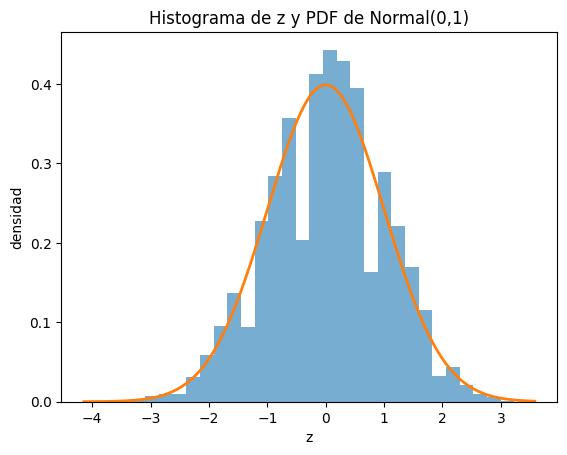

In [5]:
# visualización TCL con un histograma de los z
from scipy.stats import norm

plt.hist(z, bins=30, density=True, alpha=0.6)   # histograma de z
xmin, xmax = plt.xlim()                         # límites del eje x para trazar la pdf
x = np.linspace(xmin, xmax, 200)                # malla para la curva teórica
p = norm.pdf(x, 0, 1)                           # pdf de N(0,1)
plt.plot(x, p, linewidth=2)                     # curva teórica sobre el histograma
plt.title("Histograma de z y PDF de Normal(0,1)")
plt.xlabel("z")
plt.ylabel("densidad")
plt.show()


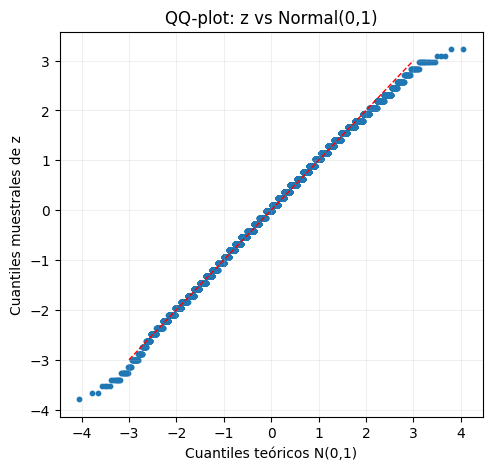

In [6]:

# 1) cuantiles teóricos de N(0,1) para probs (i - 0.5)/reps
norm_quantiles = norm.ppf((np.arange(1, reps + 1) - 0.5) / reps)

# 2) ordenar los z muestrales
sorted_z = np.sort(z)

# 3) gráfico QQ: puntos vs línea y = x
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(norm_quantiles, sorted_z, s=10)      # puntos QQ
plt.plot([-3, 3], [-3, 3], 'r--', linewidth=1)   # línea de referencia
plt.title("QQ-plot: z vs Normal(0,1)")
plt.xlabel("Cuantiles teóricos N(0,1)")
plt.ylabel("Cuantiles muestrales de z")
plt.grid(alpha=0.2)

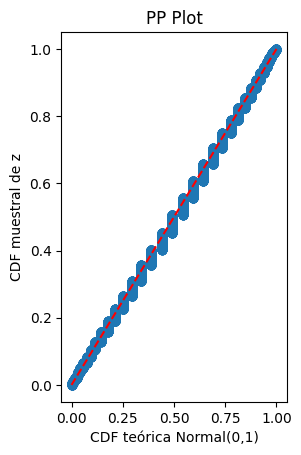

In [7]:
# visualización de PP-plot

theoretical_cdf = norm.cdf(sorted_z)
plt.subplot(1, 2, 2)
plt.scatter(theoretical_cdf, (np.arange(1, reps + 1) - 0.5) / reps)
plt.plot([0, 1], [0, 1], 'r--')
plt.title("PP Plot")
plt.xlabel("CDF teórica Normal(0,1)")
plt.ylabel("CDF muestral de z")
plt.show()


### Preguntas de Profundización: TLC en acción
1) **Sensibilidad a k y reps**  
  Varía `k = {5, 30, 100}` y `reps = {200000, 500000 , 1000000}`. ¿Cómo cambian la media y desviación de `Z_k`? Explica usando `SE = σ/√k` y el error de la media `≈ 1/√reps`.

2) **Cobertura de IC**  
  Construye IC 95% para μ con `\bar M_k ± 1.96·s/√k` en muchas réplicas. Estima la proporción de IC que contienen el valor teórico de μ. ¿Se acerca a 0.95?

3) **σ teórico vs σ estimado**  
  Estandariza con `σ/√k` y luego con `s/√k`. Compara media y sd de `Z_k`. ¿Cuál se acerca más a 0 y 1 con `k` finito?



## Ejercicio Aplicado 

La empresa “ProdServ” integra una planta de ensamblaje y un centro de servicio al cliente. En la planta operan varias líneas que producen en turnos horarios; cada línea registra el número de defectos por hora, la proporción de piezas no conformes por lote y el consumo de tiempo de máquinas en operaciones críticas. La inspección de calidad se realiza por muestreo: de cada lote de tamaño fijo se mide la fracción de no conformes y, si supera un umbral, se activa reproceso. La dirección de operaciones busca dimensionar recursos y ajustar estándares de calidad, pero las métricas clave fluctúan por la variabilidad inherente del proceso: horas “tranquilas” alternan con picos de defectos y cambios de mezcla de producto. Para planear con rigor, el equipo necesita estimar medias, dispersión y probabilidades de excedencia con control de incertidumbre.

En paralelo, el centro de servicio gestiona solicitudes de clientes asociadas a garantías y soporte técnico. Se registran los tiempos entre llegadas y los tiempos de servicio de cada caso, así como la carga simultánea por franja horaria. La gerencia requiere evaluar tiempos de respuesta, dimensionar personal y establecer acuerdos de nivel de servicio. 

Para ambos frentes se propone un enfoque de simulación Monte Carlo. Realice 20000 réplicas de tamaño 30.


### Escenario A — Planta (Producción y Calidad)

En la planta se monitorean dos métricas clave:
1) **Defectos por hora** en una línea de producción (conteos por intervalo de tiempo).                     
Utilice: Poisson con $\lambda$ = 4
2) **Proporción de no conformes por lote** (calidad por muestreo).                                              
Utilice: Binomial con $n$ = 50 y $p$ = 0.10

Use **simulación Monte Carlo** para generar datos, construir **promedios de tamaño** \(k\) por réplica, **estandarizar** y verificar el **TLC**. Además, construya **intervalos de confianza (IC)** para la media.



#### A.1 Defectos por hora (Poisson)

Suponga $X \sim \text{Poisson}(\lambda)$ como el número de defectos por hora en una línea. Para cada réplica, promediamos $k$ horas: $\bar X_k = \frac{1}{k}\sum_{j=1}^k X_j$.  
Parámetros teóricos: $\mathbb E[X] = \lambda$, $\mathrm{Var}(X) = \lambda$.  

Por TCL, la estandarización

$$
Z \;=\; \frac{\bar X_k - \lambda}{\sqrt{\lambda}/\sqrt{k}}
$$

debería lucir aproximadamente $\mathcal N(0,1)$ cuando $k$ es moderado/grande.


A.1 Poisson TLC
mean(z) ~ 0.007535749520341889   sd(z) ~ 0.995830413803719
IC 95% para E[X]: (3.9977, 4.0078)   (teórico λ=4.0)


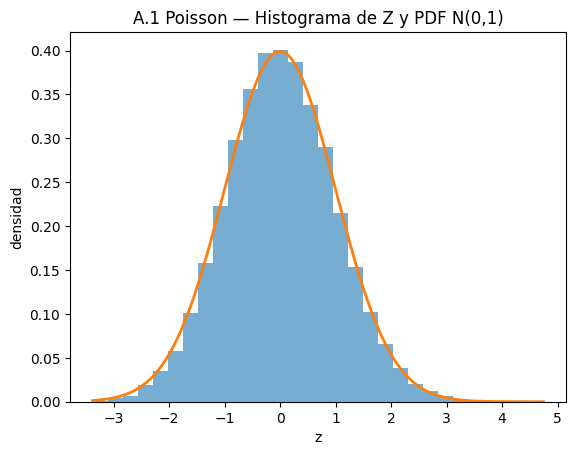

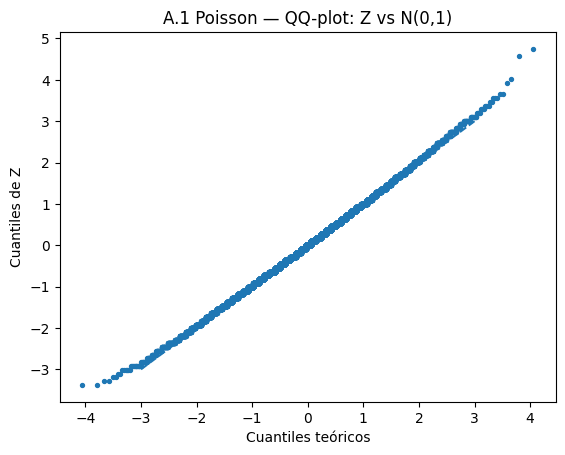

In [8]:
# A.1 Poisson: defectos por hora

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# 0) parámetros y configuración
rng   = np.random.default_rng(0)  # generador con semilla
lam   = 4.0                       # defectos/hora
k     = 30                        # tamaño del promedio POR réplica
reps  = 20000                     # número de réplicas

# 1) simulación: matriz (reps, k) con conteos Poisson(λ)
X = rng.poisson(lam=lam, size=(reps, k))

# 2) promedios por réplica
means = X.mean(axis=1)

# 3) estandarización por TLC con parámetros teóricos
z = (means - lam) / (np.sqrt(lam) / np.sqrt(k))

print("A.1 Poisson TLC")
print("mean(z) ~", z.mean(), "  sd(z) ~", z.std(ddof=1))

# 4) IC 95% para μ=λ usando σ conocida (aprox normal)
mu_hat = means.mean()
se_hat = (np.sqrt(lam) / np.sqrt(k)) / np.sqrt(reps)  # error estándar del promedio de 'means'
lo = mu_hat - 1.96 * se_hat
hi = mu_hat + 1.96 * se_hat
print(f"IC 95% para E[X]: ({lo:.4f}, {hi:.4f})   (teórico λ={lam})")

# 5) visualizacione
# Histograma de Z vs N(0,1)
plt.figure()
plt.hist(z, bins=30, density=True, alpha=0.6)
xs = np.linspace(z.min(), z.max(), 300)
plt.plot(xs, norm.pdf(xs), linewidth=2)
plt.title("A.1 Poisson — Histograma de Z y PDF N(0,1)")
plt.xlabel("z")
plt.ylabel("densidad")
plt.show()

# QQ-plot
sorted_z = np.sort(z)
q_the = norm.ppf((np.arange(1, reps + 1) - 0.5) / reps)
plt.figure()
plt.scatter(q_the, sorted_z, s=8)
plt.plot([-3, 3], [-3, 3], linestyle="--")
plt.title("A.1 Poisson — QQ-plot: Z vs N(0,1)")
plt.xlabel("Cuantiles teóricos")
plt.ylabel("Cuantiles de Z")
plt.show()


#### A.2 Proporción de no conformes por lote (Binomial)

Cada lote tiene tamaño $n$. El número de no conformes $B \sim \text{Binomial}(n, p)$.  
Proporción por lote $Y = B/n$.  
Para cada réplica, promediamos $k$ lotes: $\bar Y_k = \frac{1}{k}\sum_{j=1}^k Y_j$.

Teoría: $\mathbb E[Y]=p$, $\mathrm{Var}(Y) = \dfrac{p(1-p)}{n}$.  

Por TCL, la estandarización

$$
Z \;=\; \frac{\bar Y_k - p}{\sqrt{p(1-p)/(n\,k)}}
$$

debería lucir aproximadamente $\mathcal N(0,1)$ si $n$ y $k$ son razonables y $p$ no es extremo.


A.2 Proporciones TLC
mean(z) ~ 0.001067222077623587   sd(z) ~ 0.9970079531158527
IC 95% para E[Y]: (0.0999, 0.1001)   (teórico p=0.1)


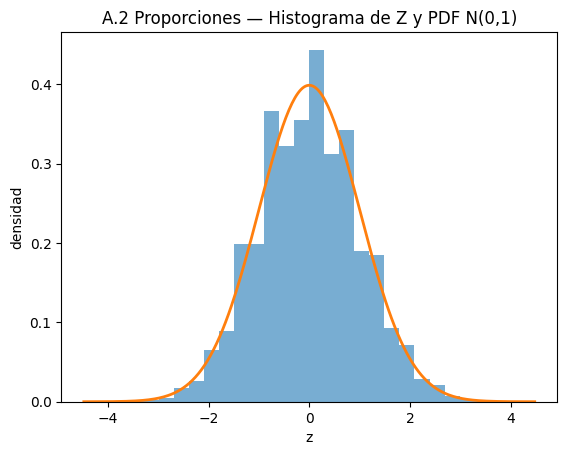

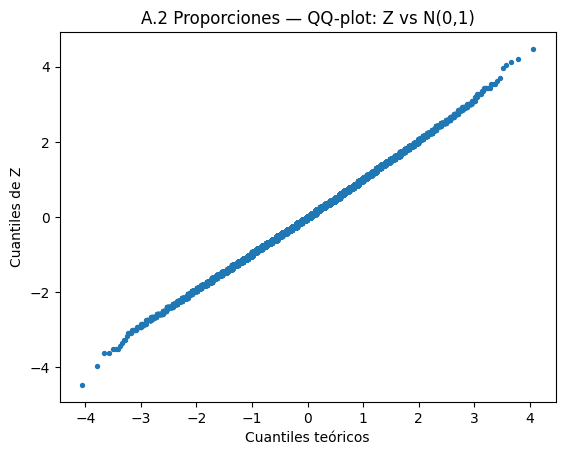

In [9]:
# A.2 Binomial (proporción de no conformes por lote)

# 0) parámetros y configuración
rng   = np.random.default_rng(1)
p     = 0.10          # probabilidad de no conformes
n     = 50            # tamaño de lote 
k     = 30            # tamaño del promedio POR réplica (nº de lotes promediados)
reps  = 20000         # número de réplicas

# 1) simulación: B ~ Bin(n,p) por lote, y proporción Y = B/n
B = rng.binomial(n=n, p=p, size=(reps, k))
Y = B / n

# 2) promedios por réplica
means = Y.mean(axis=1)

# 3) estandarización por TLC con parámetros teóricos
z = (means - p) / np.sqrt(p*(1-p)/(n*k))

print("A.2 Proporciones TLC")
print("mean(z) ~", z.mean(), "  sd(z) ~", z.std(ddof=1))

# 4) IC 95% para p usando aproximación normal con var teórica conocida
mu_hat = means.mean()
se_hat = np.sqrt(p*(1-p)/(n*k)) / np.sqrt(reps)   # error estándar del promedio de 'means'
lo = mu_hat - 1.96 * se_hat
hi = mu_hat + 1.96 * se_hat
print(f"IC 95% para E[Y]: ({lo:.4f}, {hi:.4f})   (teórico p={p})")

# 5) visualizaciones
plt.figure()
plt.hist(z, bins=30, density=True, alpha=0.6)
xs = np.linspace(z.min(), z.max(), 300)
plt.plot(xs, norm.pdf(xs), linewidth=2)
plt.title("A.2 Proporciones — Histograma de Z y PDF N(0,1)")
plt.xlabel("z")
plt.ylabel("densidad")
plt.show()

sorted_z = np.sort(z)
q_the = norm.ppf((np.arange(1, reps + 1) - 0.5) / reps)
plt.figure()
plt.scatter(q_the, sorted_z, s=8)
plt.plot([-3, 3], [-3, 3], linestyle="--")
plt.title("A.2 Proporciones — QQ-plot: Z vs N(0,1)")
plt.xlabel("Cuantiles teóricos")
plt.ylabel("Cuantiles de Z")
plt.show()


### Escenario B — Servicio (Atención al cliente)

Analizaremos métricas de tiempo en un centro de servicio:

1) **Tiempos de servicio** por caso, modelados con una Exponencial de tasa $\lambda$.    
Utilice: Exponencial con $\lambda$ = 0.6
2) **Tiempos entre llegadas** (interarribos), también Exponencial con tasa $\lambda_a$.        
Utilice: Exponencial con $\lambda_a$ = 0.7

Use **simulación Monte Carlo** para generar datos, construir **promedios de tamaño** \(k\) por réplica, **estandarizar** y verificar el **TLC**. Además, construya **intervalos de confianza (IC)** para la media.


### B.1 Tiempos de servicio ~ Exponencial ($\lambda$)

Si $T \sim \mathrm{Exp}(\lambda)$, entonces:
- $\mathbb{E}[T] = 1/\lambda$, $\ \mathrm{Var}(T) = 1/\lambda^2$, $\ \sigma = 1/\lambda$.
- Promedio de $k$ servicios por réplica: $\bar T_k = \frac{1}{k}\sum_{j=1}^{k} T_j$.
- Estandarización por TLC:

$$
Z \;=\; \frac{\bar T_k - 1/\lambda}{\,(1/\lambda)/\sqrt{k}\,} \;\approx\; \mathcal{N}(0,1).
$$


B.1 Servicio TLC
mean(z) ~ 0.00523505148764798   sd(z) ~ 0.9995763729705178
IC 95% (σ conocida): (1.6640, 1.6725)   (teórico 1/λ = 1.6667)


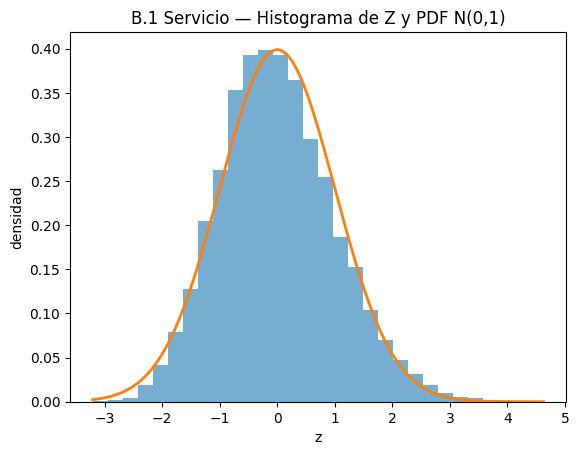

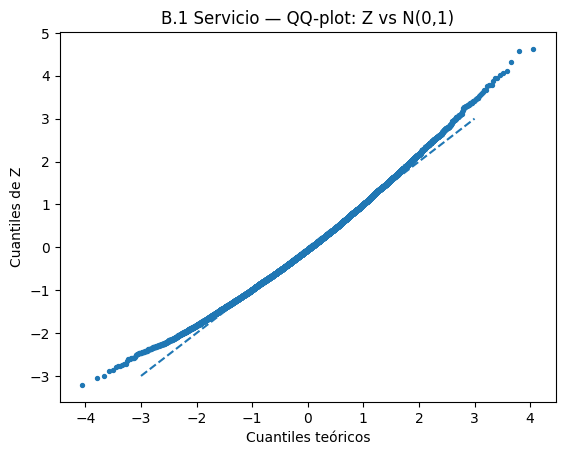

In [10]:
# B.1 Exponencial: tiempos de servicio

# 0) parámetros
rng  = np.random.default_rng(10)  # generador con semilla
lam  = 0.6                        # tasa de servicio 
k    = 30                         # tamaño del promedio POR réplica
reps = 20000                      # número de réplicas

# 1) simulación: matriz (reps, k) con T ~ Exp(lam)
#    Nota: en NumPy, exponencial usa 'scale = 1/lam'
T = rng.exponential(scale=1/lam, size=(reps, k))

# 2) promedios por réplica
means = T.mean(axis=1)

# 3) estandarización por TLC con parámetros teóricos
mu    = 1/lam
sigma = 1/lam
z = (means - mu) / (sigma/np.sqrt(k))

print("B.1 Servicio TLC")
print("mean(z) ~", z.mean(), "  sd(z) ~", z.std(ddof=1))

# 4) IC 95% para E[T]
se_known = (sigma/np.sqrt(k)) / np.sqrt(reps)
lo_k = means.mean() - 1.96 * se_known
hi_k = means.mean() + 1.96 * se_known
print(f"IC 95% (σ conocida): ({lo_k:.4f}, {hi_k:.4f})   (teórico 1/λ = {mu:.4f})")


# 5) visualizaciones
# Histograma de Z vs N(0,1)
plt.figure()
plt.hist(z, bins=30, density=True, alpha=0.6)
xs = np.linspace(z.min(), z.max(), 300)
plt.plot(xs, norm.pdf(xs), linewidth=2)
plt.title("B.1 Servicio — Histograma de Z y PDF N(0,1)")
plt.xlabel("z")
plt.ylabel("densidad")
plt.show()

# QQ-plot 
sorted_z = np.sort(z)
q_the = norm.ppf((np.arange(1, reps + 1) - 0.5) / reps)
plt.figure()
plt.scatter(q_the, sorted_z, s=8)
plt.plot([-3, 3], [-3, 3], linestyle="--")
plt.title("B.1 Servicio — QQ-plot: Z vs N(0,1)")
plt.xlabel("Cuantiles teóricos")
plt.ylabel("Cuantiles de Z")
plt.show()


#### B.2 Tiempos entre llegadas ~ Exponencial ($\lambda_a$)

Si $A \sim \mathrm{Exp}(\lambda_a)$ modela el tiempo entre llegadas:
- $\mathbb{E}[A] = 1/\lambda_a$, $\ \sigma_A = 1/\lambda_a$.
- Promedio de $k$ interarribos por réplica y estandarización análoga:

$$
Z \;=\; \frac{\bar A_k - 1/\lambda_a}{(1/\lambda_a)/\sqrt{k}} \;\approx\; \mathcal{N}(0,1).
$$


B.2 Interarribos TLC
mean(z) ~ 0.00531524274286857   sd(z) ~ 1.0029689304219433
IC 95% para E[A]: (1.4263, 1.4336)   (teórico 1/λ_a = 1.4286)


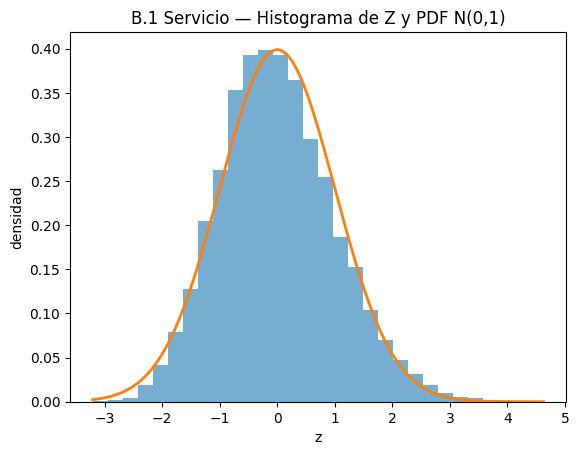

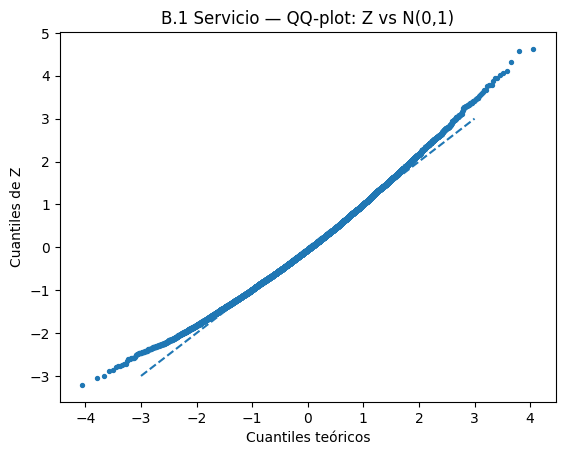

In [11]:
# B.2 Exponencial: tiempos entre llegadas

# 0) parámetros
rng    = np.random.default_rng(11)
lam_a  = 0.7            # tasa de llegadas
k      = 30
reps   = 20000

# 1) simulación: A ~ Exp(lam_a)
A = rng.exponential(scale=1/lam_a, size=(reps, k))
means_A = A.mean(axis=1)

# 2) estandarización por TLC
mu_A    = 1/lam_a
sigma_A = 1/lam_a
zA = (means_A - mu_A) / (sigma_A/np.sqrt(k))

print("B.2 Interarribos TLC")
print("mean(z) ~", zA.mean(), "  sd(z) ~", zA.std(ddof=1))

# 3) IC 95% para E[A]
seA_known = (sigma_A/np.sqrt(k)) / np.sqrt(reps)
loA = means_A.mean() - 1.96 * seA_known
hiA = means_A.mean() + 1.96 * seA_known
print(f"IC 95% para E[A]: ({loA:.4f}, {hiA:.4f})   (teórico 1/λ_a = {mu_A:.4f})")

# 5) visualizaciones
# Histograma de Z vs N(0,1)
plt.figure()
plt.hist(z, bins=30, density=True, alpha=0.6)
xs = np.linspace(z.min(), z.max(), 300)
plt.plot(xs, norm.pdf(xs), linewidth=2)
plt.title("B.1 Servicio — Histograma de Z y PDF N(0,1)")
plt.xlabel("z")
plt.ylabel("densidad")
plt.show()

# QQ-plot 
sorted_z = np.sort(z)
q_the = norm.ppf((np.arange(1, reps + 1) - 0.5) / reps)
plt.figure()
plt.scatter(q_the, sorted_z, s=8)
plt.plot([-3, 3], [-3, 3], linestyle="--")
plt.title("B.1 Servicio — QQ-plot: Z vs N(0,1)")
plt.xlabel("Cuantiles teóricos")
plt.ylabel("Cuantiles de Z")
plt.show()



Universidad de los Andes | Vigilada Mineducación. Reconocimiento como Universidad: Decreto 1297 del 30 de mayo de 1964. Reconocimiento personería jurídica: Resolución 28 del 23 de febrero de 1949 Minjusticia. Departamento de Ingeniería Industrial Carrera 1 Este No. 19 A 40 Bogotá, Colombia Tel. (57.1) 3324320 | (57.1) 3394949 Ext. 2880 /2881 http://industrial.uniandes.edu.co